In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%%capture
# set up path to include parent directory
import sys
sys.path.append('../')

# Import everything from the data_utils library
from data_utils import *

# Load the talk data
talk_data = get_only_talks(load_data())

In [3]:
# Import libraries and setup matplotlib defaults
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
pl.style.use('bmh')
prop_cycle = pl.cycler(color=['#377eb8','#e41a1c','#4daf4a','#984ea3',
                              '#ff7f00','#ffff33','#a65628','#f781bf','#999999'])
pl.rcParams.update({
    'axes.prop_cycle': prop_cycle,
    'lines.linewidth': 2,
    'font.size': 20,
    'figure.figsize': [12, 8],
    'figure.subplot.left': 0.125,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.15})

def text_search_plot(search, title_str, leg_loc=None, spacer=' ', group='year', filename=None):
    if 'top_user' not in search.keys():
        search.update({'top_user': 'true'})
    result = text_search(talk_data, search, group=group, spacer=spacer, quiet=True)
    #fig, ax = pl.subplots()
    #result.plot(ax=ax, legend=False)
    result.plot(title=title_str,
                ylabel='references per million words',
                xlabel='year',
                ylim=[0, None],
               )
    #pl.legend(result.columns, loc=leg_loc)
    #pl.grid(axis='x')

In [4]:
# The "top_ngrams.pkl" file referenced below is created by running
# the "run_text_analysis.py" script beforehand.
top_ngrams = pandas.read_pickle('../top_ngrams.pkl')
top_ngrams.columns.name = 'time period'
for word in ['indians', 'lord', 'jesus', 'christ',
             'heavenly', 'father', 'relief', 'society', 'i ']:
    top_ngrams.index = top_ngrams.index.str.replace(word, word.capitalize())
top_ngrams = top_ngrams.replace(0.999, 0)
time_cols = top_ngrams.columns[top_ngrams.columns.str.startswith('1')]

This document examines changes in language usage that can be measured using the available general conference texts from 1942-2021. In order to understand what words or phrases have changed most significantly in usage, I have divided the time from 1942-2021 into 3 equal-sized periods:
- 1942-1968
- 1968-1995
- 1995-2021

The split into thirds meant that 1968 and 1995 have their April and October conferences put into different time periods.

For all of the talks I counted all phrases containing up to seven words, as well as individual words, for each of the time periods. If a phrase is a subset of a longer phrase that had at least 80% of the usages of the shorter phrase, the shorter phrase was deleted in favor of the longer phrase. An example might be removing "Family Home" because it nearly always occurs as part of the phrase "Family Home Evening".

To quantify the amount usage changed, I calculated the ratio between the usage count in the most used time period to the least used time period. If a phrase was not used at all in one of the time periods, 1 was substituted for 0 so that the ratio is defined.

The table below summarizes some basic data about each of the three time periods: the maximum to minimum ratio (which I will refer to subsequently as the "change ratio"), and the total number of phrases with a ratio greater than 10. The significantly larger count in the last period indicates there are significantly more phrases that have newly come into use than those that have fallen out of use. I will now examine in more detail some of the top phrases that peaked in each of the periods.

In [5]:
peak_data = top_ngrams.groupby('peak').agg({"ratio": [np.max, np.size]})
peak_data.columns = ['change ratio', 'number of phrases with ratio>10']
peak_data.round(1)

,change ratio,number of phrases with ratio>10
peak,,
1942-1968,260.0,24
1968-1995,484.5,6
1995-2021,331.3,52


## Phrases that peaked in the 1942-1968 period
Of the 24 phrases that peaked in the early period, the chart below shows the top 10.

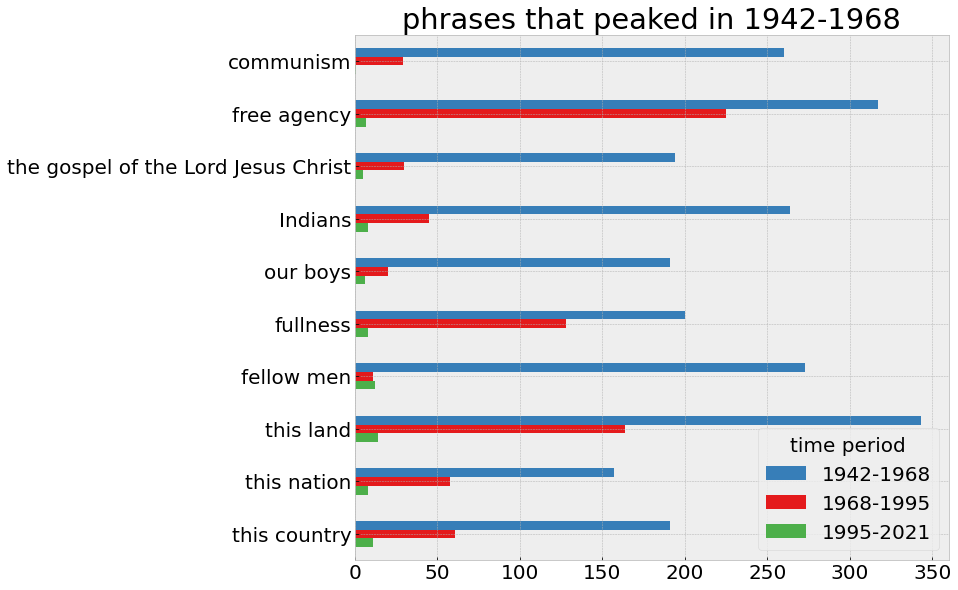

In [6]:
table1 = top_ngrams[top_ngrams['peak']==time_cols[0]].drop(columns=['peak', 'words'])
ax = table1[time_cols][:10].plot.barh(
    title='phrases that peaked in 1942-1968',
    figsize=[10,10], xlabel='', ylabel='usages')
ax.invert_yaxis()

The word with the highest change ratio is the word "communism", which owes it's high ratio in part to the fact that it hasn't been used from the pulpit since 1980, but was spoken of frequently during the 1960s. Nearly half of all references to communism come from Ezra Taft Benson, who famously used the pulpit to preach against communism regularly during the 1960s. That ratio is a significant outlier compared to most of the other words and phrases we will analyze here. Aside from Benson's particular obsession with preaching about communism, we can see that there was also a surge in usage by other speakers for a period in the late 1940s, likely a reaction to the beginning of the Cold War.

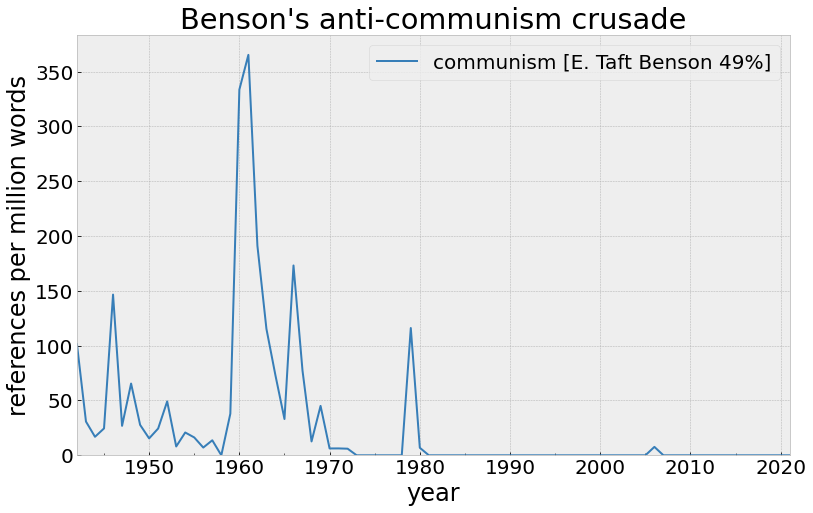

In [7]:
text_search_plot({'search': [{'include': 'communism'}]},
                'Benson\'s anti-communism crusade')

It is perhaps not a coincidence that the phrase "free agency" comes up as another phrase used heavily during that era, because the phrase was also used at times to promote anti-communism, but the phrase had broader applications in talks. For comparison, in the chart below I include the phrases "free agency", "moral agency" and other uses of the word "agency". The phrase "moral agency" was promoted for a time (by Boyd K. Packer in particular) as a preferred alternative to "free agency" (free agency sounded a bit too much like "free love" to him), but it hasn't really caught on. Instead, "free agency" has largely fallen out of use and been replaced with just "agency".

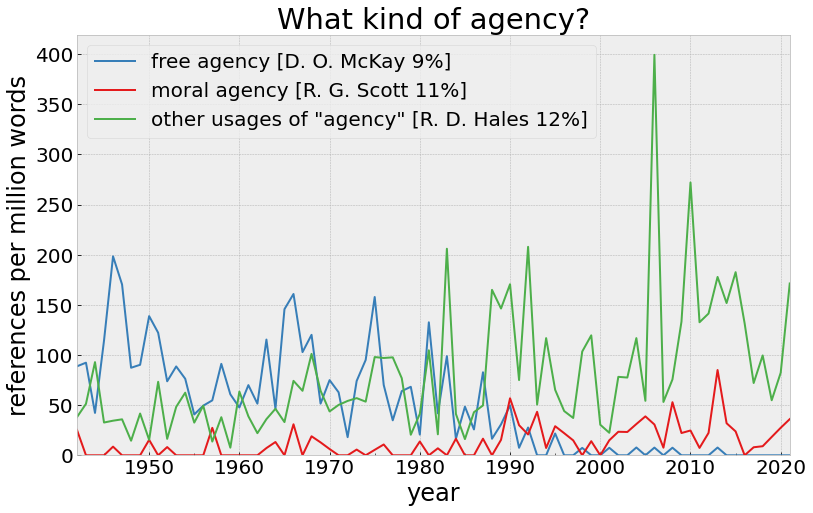

In [8]:
text_search_plot(
    {"search": [{"label": "free agency",
                 "include": "free agency"},
                {"label": "moral agency",
                 "include": "moral agency"},
                {"label": "other usages of \"agency\"",
                 "include": "agency",
                 "exclude": ["free agency", "moral agency"]}]},
    'What kind of agency?')

In [9]:
%%capture
# This block of code, when the output is shown, is used to
# calculate the two values referenced in the text below
jlw_usage = talk_data[talk_data['author']=='Joseph L. Wirthlin']['body'] \
    .str.lower().str.count('the gospel of the lord jesus christ')
(len(jlw_usage), jlw_usage.mean())

The phrase "the gospel of the Lord Jesus Christ" is a very specific phrase that seems to have been a favorite of one specific speaker, Joseph L. Wirthlin, who was a member of the presiding bishopric from 1938-1961. He gave 37 talks 1942-1961 and used the phrase an average of 2.8 times in each talk. The phrase is rarely used today.

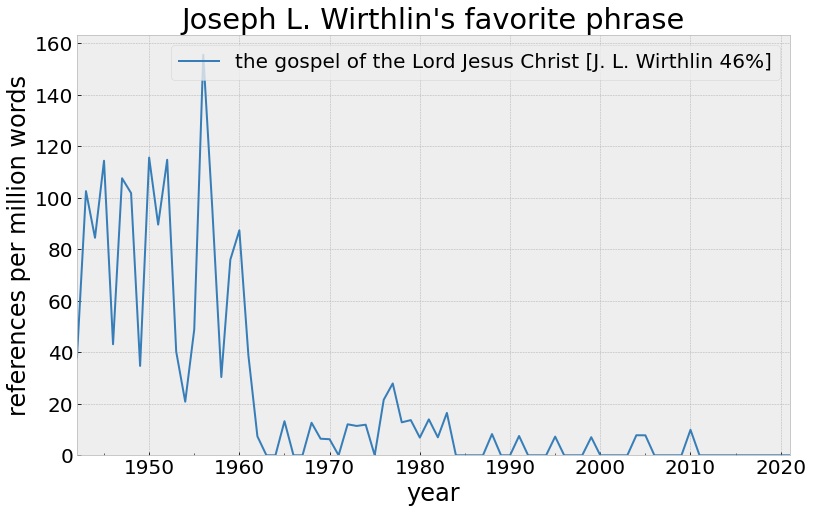

In [10]:
text_search_plot({'search': [{'include': 'the gospel of the lord jesus christ',
                              'label': 'the gospel of the Lord Jesus Christ'}]},
                'Joseph L. Wirthlin\'s favorite phrase')

The next plot shows the next two words on the list, "Indians" and "our boys". "Our boys" was used heavily during World War II and is clearly being used in reference to the war and those serving in the military at the time. "Indians" is a word that was heavily used by Spencer W. Kimball. He gave several talks as a young apostle talking about his work with Native Americans and in particular the Indian Placement Program that he oversaw. Use of the word in general conference largely ended with the end of the placement program.

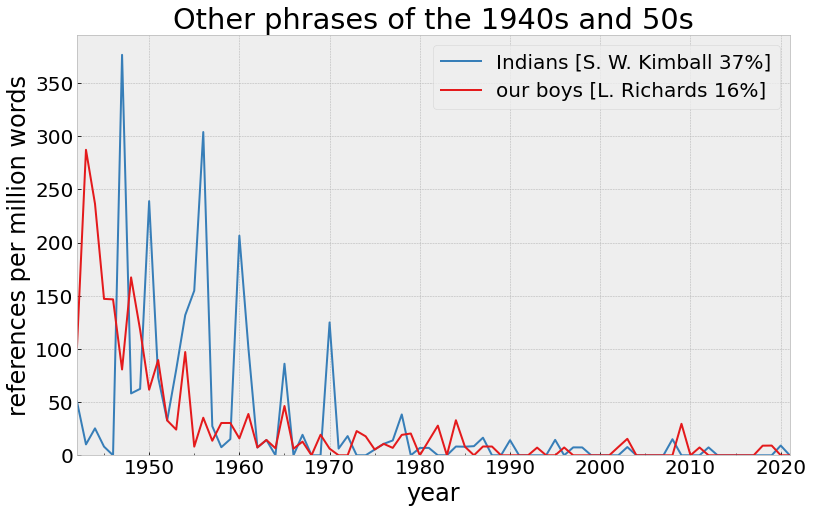

In [11]:
text_search_plot(
    {"search": [{"label": "Indians",
                 "include": "indians"},
                {"include": "our boys"}]},
    'Other phrases of the 1940s and 50s')

The next two words, "fellow men" and "fullness" both show up on the list because of sudden shifts in predominant spelling. For some reason, in 1965 the preferred spelling of "fellow men" suddenly shifted to make it one word: "fellowmen". In the other case, both "fulness" and "fullness" appear to be [accepted spellings of the same word](https://www.merriam-webster.com/dictionary/fullness), but the preferred spelling in published general conference text seems to have flipped from one to the other and back again, twice.

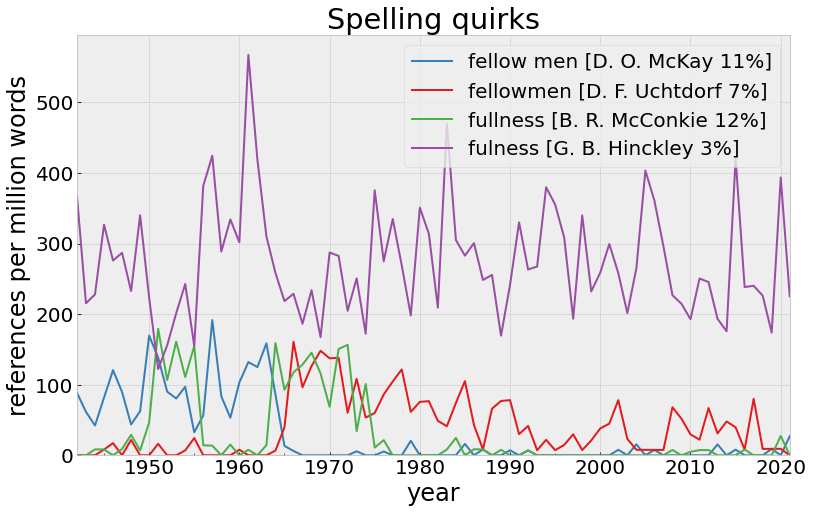

In [12]:
text_search_plot(
    {"search": [{"include": "fellow men"},
                {"include": "fellowmen"},
                {"include": "fullness"},
                {"include": "fulness"}]},
    'Spelling quirks')

The last three phrases on the list all represent the America-centric thinking of the church before its international expansion in the late 20th century: "this land", "this nation", and "this country". Notably, two of them were most heavily used once again by Ezra Taft Benson. All three phrases dropped off significantly in usage around 1980, and are rarely ever used now.

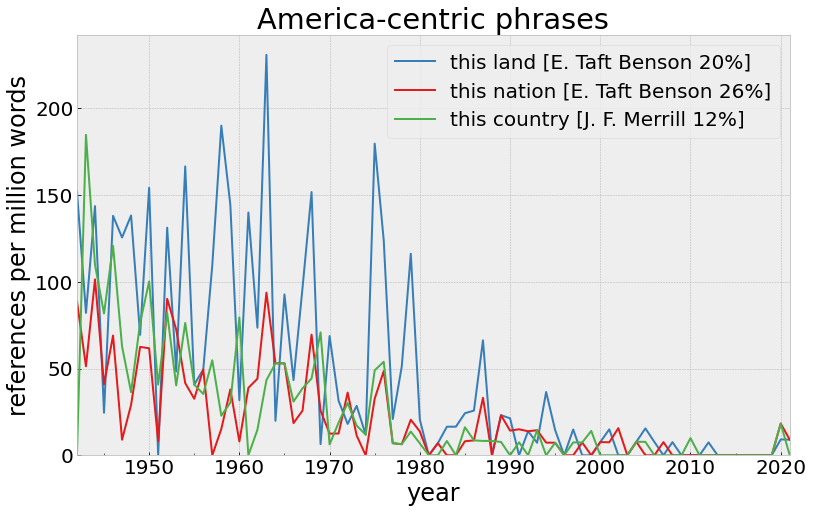

In [13]:
text_search_plot(
    {"search": [{"include": "this land"},
                {"include": "this nation"},
                {"include": "this country"}]},
    'America-centric phrases')

# Phrases that peaked 1968-1995
The middle period had only 6 phrases that peaked during that era with a high change ratio, all of which are shown in the graph below.

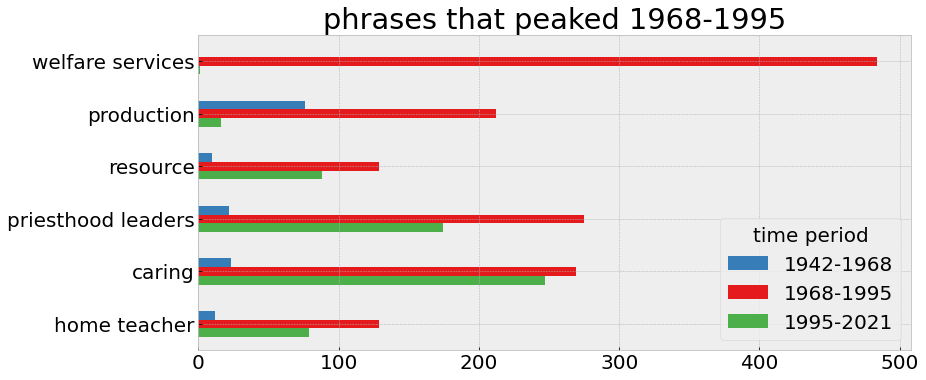

In [14]:
table2 = top_ngrams[top_ngrams['peak']==time_cols[1]].drop(columns=['peak', 'words'])
ax = table2[time_cols][:10].plot.barh(
    title='phrases that peaked 1968-1995',
    figsize=[12, 6], xlabel='', ylabel='usages')
ax.invert_yaxis()

Perhaps the most unusual of these phrases is "welfare services", but as it turns out, two other words from this era, "production" and "resource" also peaked at the same time, and most likely for the same reasons. From the mid 1970s through the early 1980s there was a welfare session that was held as part of each general conference. It was led by the presiding bishop of the church at the time, Victor L. Brown, and it appears to have been intended as a sort of training session for bishops and local leaders with a focus on the welfare program. All three of the words and phrases in the plot below appear to have surged in usage because they were spoken of regularly during the welfare session.

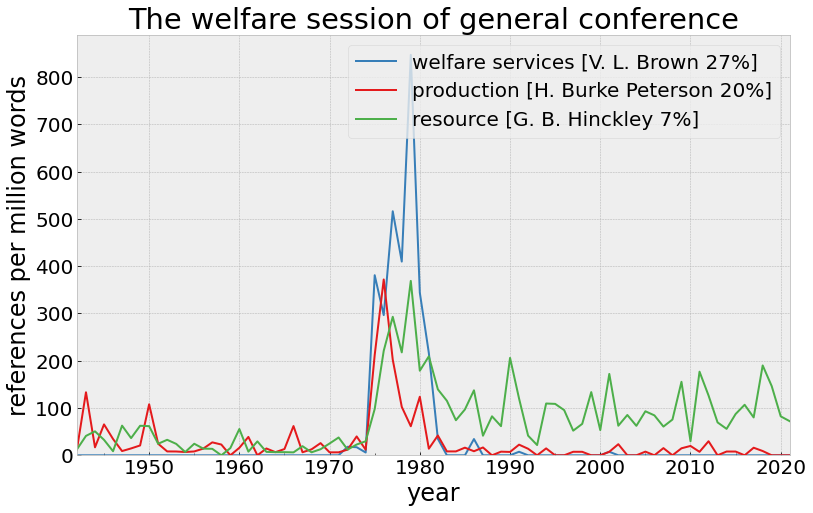

In [15]:
text_search_plot(
    {"search": [{"include": "welfare services"},
                {"include": "production"},
                {"include": "resource"}]},
    'The welfare session of general conference')

The remaining three phrases are shown in the plot below. The sudden surge in the phrase "home teacher" in the late 1960s corresponds to the introduction of that program. It's hard to tell why "priesthood leaders" came into use in the 1970s after rarely being used before that, but the best explanation may be that it came into use as a result of the correlation program as a standardized way of refering to local leaders. The word "caring" seems to have come into use also around the time that the welfare session was part of general conference. Many of the most used contexts for the word are variations of "caring for the poor" and "caring for the needy". That one seems to have stuck around after the end of the welfare session more than the other ones.

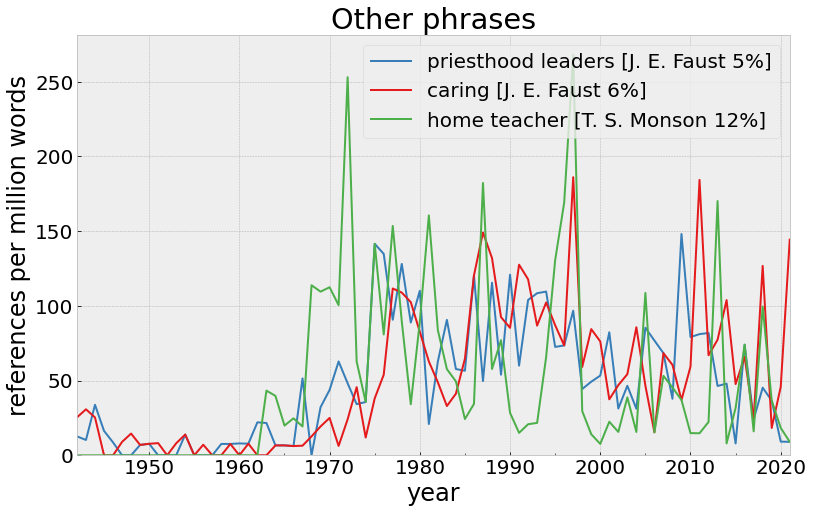

In [16]:
text_search_plot(
    {"search": [{"include": "priesthood leaders"},
                {"include": "caring"},
                {"include": "home teacher"}]},
    'Other phrases')

# Phrases that peaked after 1995
Of the 56 phrases that peaked after 1995 with a high change ratio, the top 15 are shown in the chart below. Some of these are unsurprising, such as "internet", but others are a bit odd or unexpected.

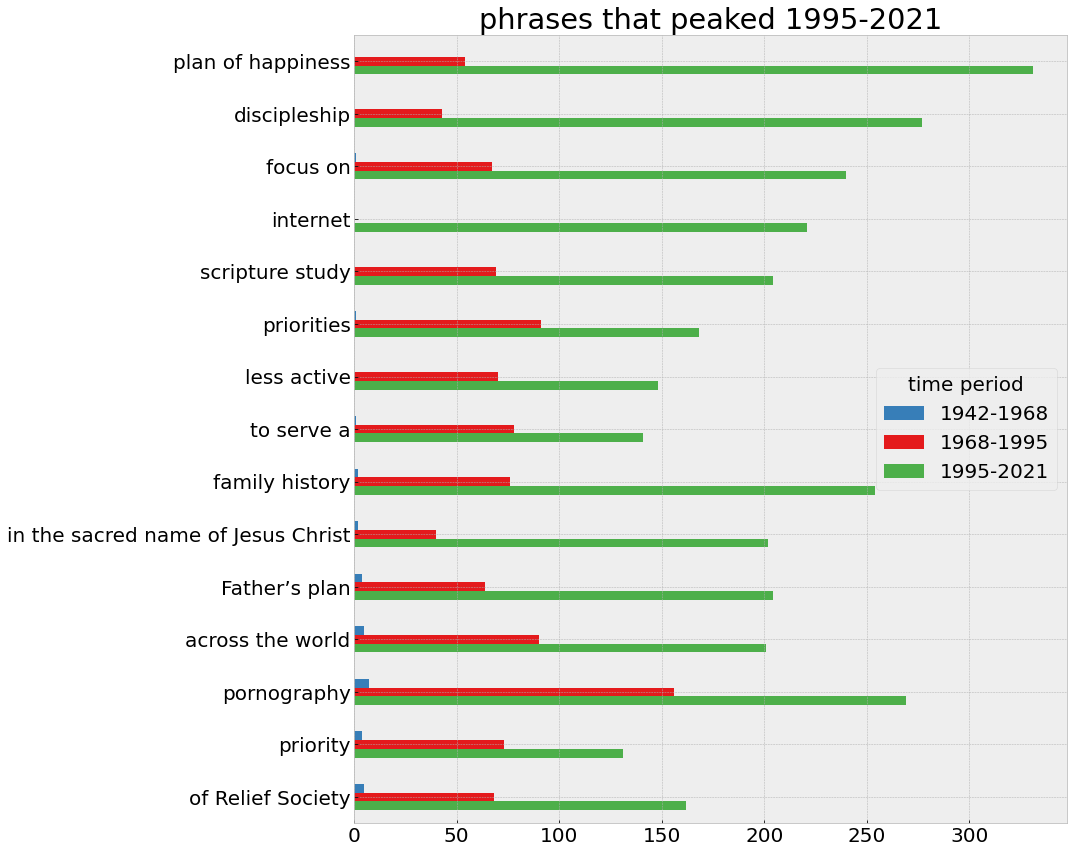

In [17]:
table3 = top_ngrams[top_ngrams['peak']==time_cols[2]].drop(columns=['peak', 'words'])
ax = table3[time_cols][:15].plot.barh(
    title='phrases that peaked 1995-2021',
    figsize=[12, 15], xlabel='', ylabel='usages')
ax.invert_yaxis()

In [18]:
%%capture
# The results of this command are discussed in the paragraph below but omitted
# from this version of the document.
first_users(talk_data, 'plan of happiness', 20)

On the surface, one of the more curious new trends in this group is the one at the top of the list: "plan of happiness". First used by Marion D. Hanks in 1979, it was used a handful of times in the 1980s, but it really took off after being used multiple times by 3 different speakers (Boyd K. Packer, Russell M. Nelson, and Dallin H. Oaks) all in the October 1993 conference. Concurrent with this is a surge in the use of of the phrase "Father’s plan", which also appears near the top of the change ratio list above. The two-word phrase typically appears as part of the longer phrases "Heavenly Father’s plan", "our Father’s plan", and "the Father’s plan". 

In the chart below I have also included the related phrase "plan of salvation" for reference. It turns out to have been used with some regularity all along, but has also increased a bit since the 1990s. So "plan of happiness" hasn't really displaced "plan of salvation" but has become an alternative phrase that seems to be preferred by some speakers.

So, why the sudden spike in reference to "plan of happiness" and "Father’s plan"? The giveaway is that it occurs in the mid 1990s, the era when the Family Proclamation was first released. The word "plan" is key to the proclamation, occuring in the document 5 times, in the following contexts:

- "Creator’s plan"
- "His plan"
- "plan of happiness"
- "God’s eternal plan"
- "His eternal plan"

This suggests that the idea of a "plan" was considered a key concept to the authors of the document, and the proclamation's influence on general conference speakers in the following decades shows up clearly in the data.

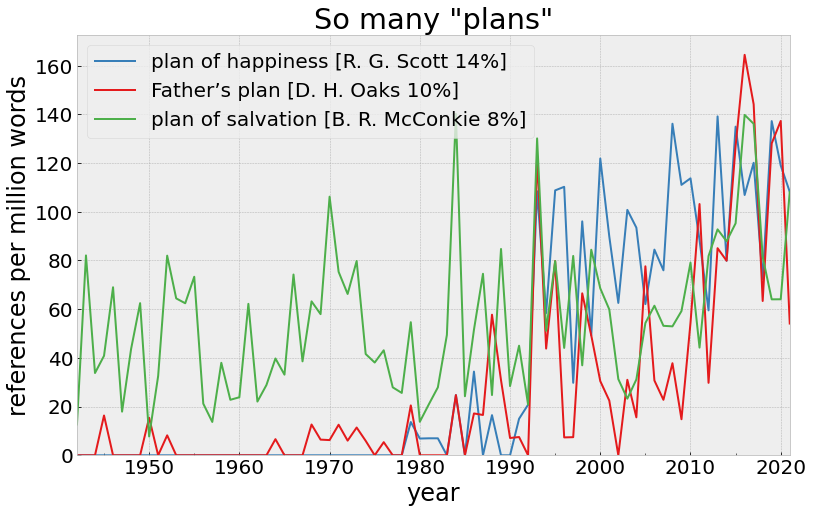

In [19]:
s = u"father"+rsqm+"s plan"
text_search_plot(
    {"search": [{"include": "plan of happiness"},
                {"include": s, "label": s.capitalize()},
                {"include": "plan of salvation"}]},
    'So many "plans"')

The next one is the word "discipleship". It was first used, once again, by Marion D. Hanks, in 1975. It is a favorite word of Dieter Uchtdorf, who is responsible for 25% of all uses. In the plot below I have included the word "disciple" for comparison. That word has also increased significantly in usage over the last decade, but from a baseline of being regularly used.

In [20]:
%%capture
first_users(talk_data, 'discipleship')

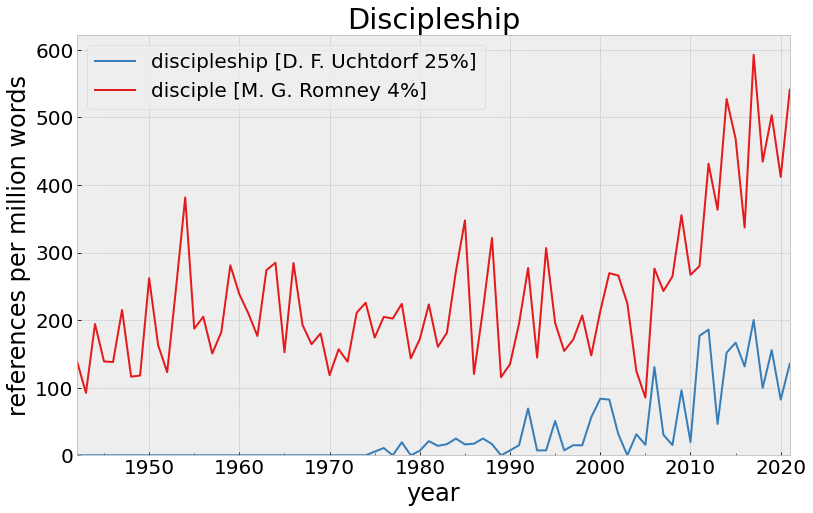

In [21]:
text_search_plot(
    {"search": [{"include": "discipleship"},
                {"include": "disciple", "exclude": ["discipleship"]}]},
    'Discipleship')

The words "focus" and "priority" both turn up in the top 15 list of highest change ratios in more than one form. Both seem to have started to come into use in the 1970s, but "focus" in particular has continued to grow in usage and is even accelarating in usage as of 2021.

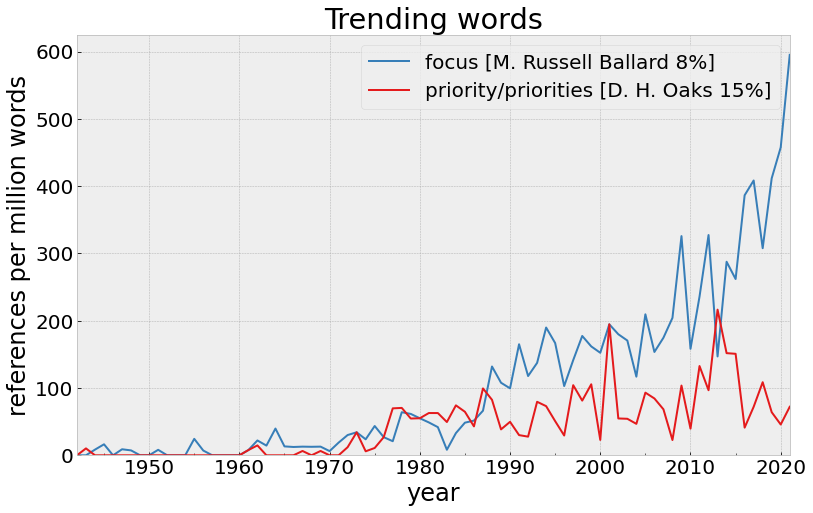

In [22]:
text_search_plot(
    {"search": [{"include": "focus"},
                {"include": "(priority|priorities)", "label": "priority/priorities"}]},
    'Trending words')

The plot below includes two phrases that both appear to be associated with technological change. The first one, "internet", is obvious. It is first used in the mid 1990s, as one would expect, but seems to have dropped off in use a bit in the last few years as it is no longer remarkable.

The phrase "across the world" seems unrelated, but it comes into regular use in the early 1980s, right when general conference began to be broadcast by video by sattelite and subsequently by internet. Interestingly, Gordon B. Hinckley is the top user of both of these phrases.

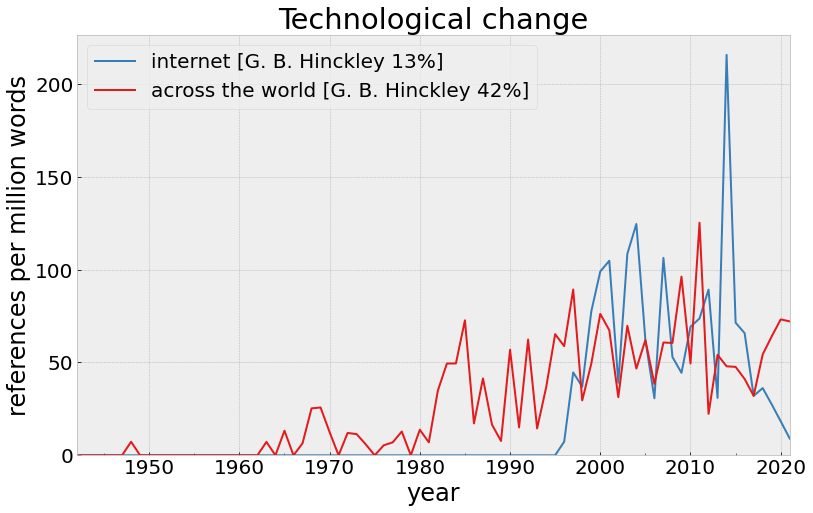

In [23]:
text_search_plot(
    {"search": [{"include": "internet"},
                {"include": "across the world"}]},
    'Technological change')

Also making the list due to never having been used during the pre-1968 period is the phrase "scripture study". Remarkably, the first time the phrase was ever used in general conference was 1975, and it now continues to be mentioned regularly.

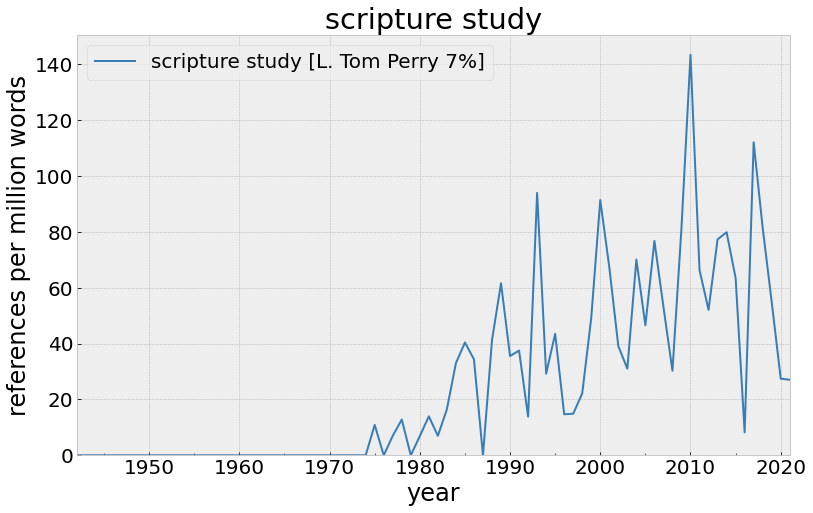

In [24]:
text_search_plot(
    {"search": [{"include": "scripture study"}]},
    'scripture study')

Those of us old enough will remember that we used to refer to church members who were not coming to church as "inactive", but at some point the preferred term came to be "less active". Thus the phrase "less active" became one of the phrases leading the list for high change ratios. The plot below compares the two phrases, and a very clear shift from one phrase to the other is evident in 1985. Some uses of the word "inactive" continue to show up in talks on occasion, but the word could be used in other contexts so it's not clear whether those more recent usages refer to members not attending church.

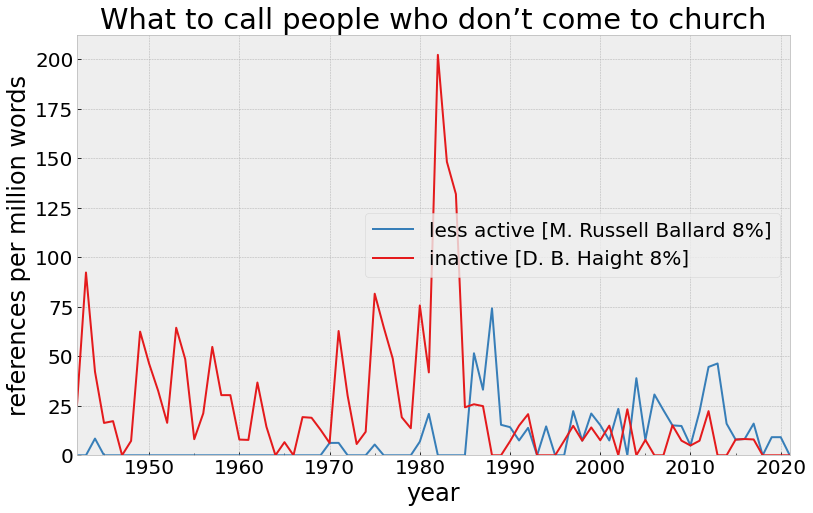

In [25]:
text_search_plot(
    {"search": [{"include": "less active"},
                {"include": "inactive"}]},
    'What to call people who don'+rsqm+'t come to church')

The presence of the words "to serve a" seems a bit curious at first glance, but it is explained by the fact that there are quite a few references to both "to serve a mission" and "to serve a full-time mission". Both are shown in the plot below. This first comes up in the 1970s but is talked about with regularity beginning in the early 1980s.

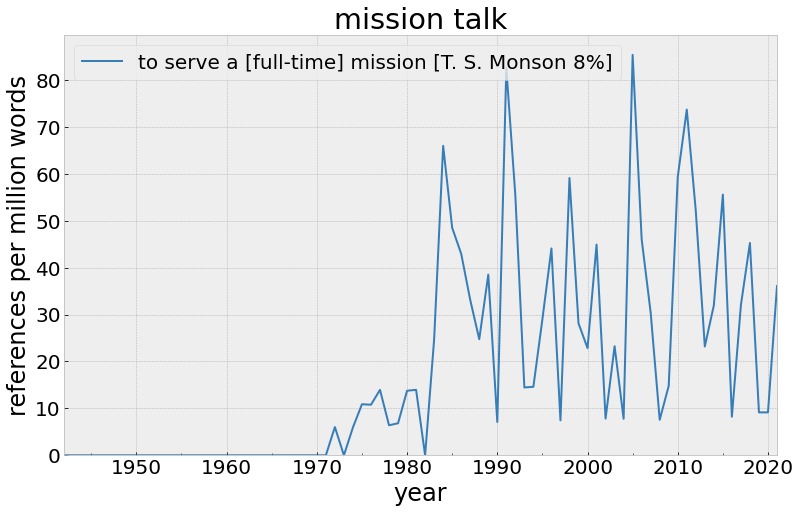

In [26]:
text_search_plot(
    {"search": [{"include": "to serve a (mission|full.time mission)",
                 "label": "to serve a [full-time] mission"}]},
    'mission talk')

The presence of "family history" in the list reflects another usage shift. In the past the term "genealogy" was used, but there is a siginifcant shift from one term to the other in the late 1980s. Also notable is that after the shift from genealogy to family history, family history is spoken of much more regularly in the last 3 decades than genealogy was in the past.

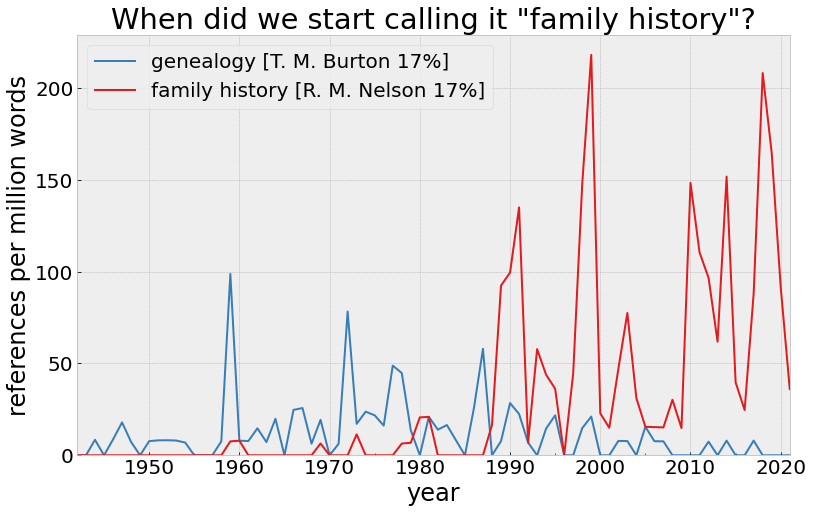

In [27]:
text_search_plot(
    {"search": [{"include": "genealogy"},
                {"include": "family history"}]},
    'When did we start calling it "family history"?')

In another case of a particular phrase being preferred by a few speakers and then catching on with others, it has become quite common for speakers to end their talks with "in the *sacred* name of Jesus Christ". It was first done on a few occasions in the 1960s and 1970s, but made a big jump in usage in about 2003.

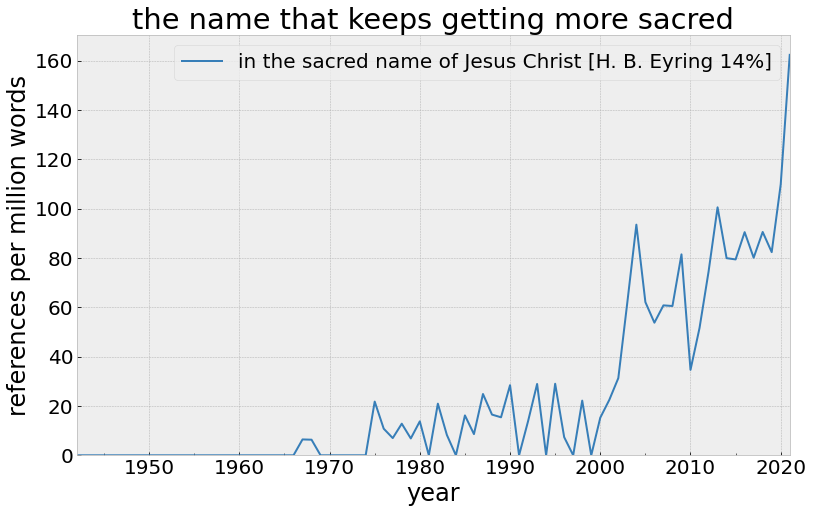

In [28]:
text_search_plot(
    {"search": [{"include": "in the sacred name of jesus christ",
                 "label": "in the sacred name of Jesus Christ"}]},
    'the name that keeps getting more sacred')

It may come as no surprise to anyone who has paid attention to general conference post-2000 that pornography makes the list. There are a few notable details in the plot below. There appear to be two distinct surges in references to pornography, one in the 1970s, and a second in the 2000s which is clearly a response to the phenomenon of internet pornography. The peak of references to it was in 2006, after which there has been a pretty dramatic drop off in mentions. One possible contributor to this phenomenon is likely the death of Gordon B. Hinckley in 2007, the most prolific speaker on the subject. However, that alone may not be sufficient to explain the decrease, which since 2015 have been at levels not seen since before 1970. This suggests the possibility that a conscious decision has been made to tone down the anti-pornography rhetoric.

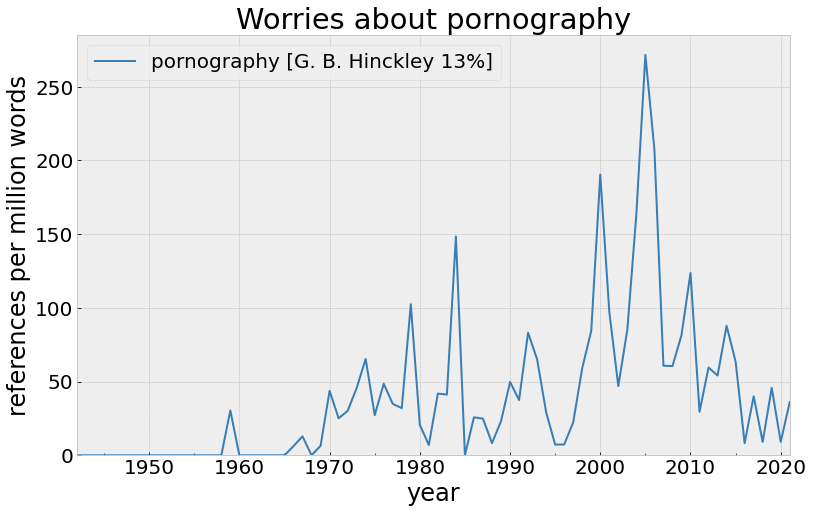

In [29]:
text_search_plot(
    {"search": [{"include": "pornography"}]},
    'Worries about pornography')

The last one on this list lacks a good explanation: "of Relief Society". Like some of the other phrases reviewed up to this point, it was disproportionately used by one speaker. This is one of the only cases where that one speaker was a woman (Julie Beck, who served in the general presidency of the Relief Society). Because women serve in those presidencies for a relatively limited time compared to male general authorities, the use of that particular phrase seems to have quickly fallen off as she was released from her calling.

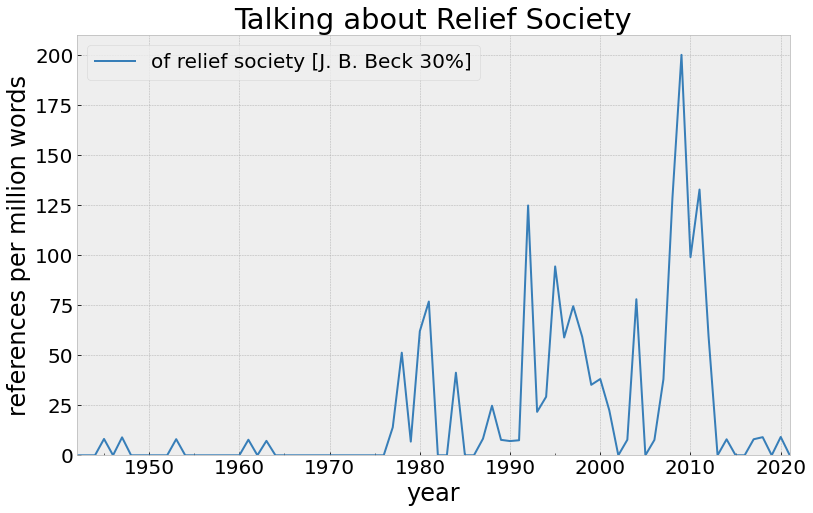

In [30]:
text_search_plot(
    {"search": [{"include": "of relief society"}]},
    'Talking about Relief Society')

# Conclusion
The phrases reviewed here represent a fraction of the total words and phrases that have increased or decreased in usage frequency over time, and these are only the ones that exhibit the most drastic change. Some of these are fairly trivial or inconsequential (such as spelling changes), while others represent significant rhetorical changes over time in what is being talked about over the pulpit in general conference.

In [31]:
# Setup show/hide source code box
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="show/hide source code"></form>''')